In [1]:
from time import sleep
import json
import requests
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
remote_host = 'cityio.media.mit.edu/cityio'
# table_name = 'costanera_conce'
# table_name = 'volpe_rd'
# table_name = 'demo_3x3'
table_name = 'test'
griddata_endpoint = f'http://{remote_host}/api/table/{table_name}/'

In [8]:
griddata_endpoint

'http://cityio.media.mit.edu/cityio/api/table/test/'

In [9]:
r = requests.get(griddata_endpoint)

In [10]:
r.status_code

200

In [12]:
r.json()

{'GEOGRID': {'features': [{'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-73.075228, -36.823754999999736],
       [-73.0750248007071, -36.82407130042315],
       [-73.07463136167937, -36.82390794221368],
       [-73.07483455964154, -36.82359163960219],
       [-73.075228, -36.823754999999736]]]},
    'properties': {'color': [185, 126, 24],
     'height': [0, 50, 100],
     'name': 'Residential',
     'interactive': True,
     'id': 0}},
   {'type': 'Feature',
    'geometry': {'type': 'Polygon',
     'coordinates': [[[-73.07483455964154, -36.82359163960219],
       [-73.07463136167937, -36.82390794221368],
       [-73.07423792077711, -36.8237445847223],
       [-73.07444111740854, -36.823428279922744],
       [-73.07483455964154, -36.82359163960219]]]},
    'properties': {'color': [185, 126, 24],
     'height': [0, 50, 100],
     'name': 'Residential',
     'interactive': True,
     'id': 1}},
   {'type': 'Feature',
    'geometry': {'type': 'Polygon',
   

In [24]:
df = pd.DataFrame(r.json()['GEOGRIDDATA'])
df.head()

,color,height,id,interactive,name
0,"[255, 255, 51]","[None, 100, None]",0,Web,Residential
1,"[255, 255, 51]","[None, 100, None]",1,Web,Residential
2,"[255, 255, 51]","[None, 100, None]",2,Web,Residential
3,"[233, 69, 255]","[None, 100, None]",3,Web,Low Income housing
4,"[233, 69, 255]","[None, 100, None]",4,Web,Low Income housing


In [5]:
data_json = r.json()
gdf = gpd.GeoDataFrame.from_features(data_json['GEOGRID'])
gdf.head()

,geometry,color,height,name,interactive,id
0,"POLYGON ((-73.07591 -36.82542, -73.07550 -36.8...","[126, 179, 70]","[0, 0, 0]",Park,True,0
1,"POLYGON ((-73.07512 -36.82509, -73.07471 -36.8...","[126, 179, 70]","[0, 0, 0]",Park,True,1
2,"POLYGON ((-73.07433 -36.82476, -73.07393 -36.8...","[171, 143, 57]","[0, 15, 30]",Campus,False,2
3,"POLYGON ((-73.07355 -36.82444, -73.07314 -36.8...","[185, 126, 24]","[0, 50, 100]",Residential,True,3
4,"POLYGON ((-73.07276 -36.82411, -73.07235 -36.8...","[185, 126, 24]","[0, 50, 100]",Residential,True,4


In [6]:
gdf.to_parquet('/app/data/geogrid.parquet')

In [7]:
def rgb_to_hex(rgb):
    return '#{:02x}{:02x}{:02x}'.format(*rgb)

gdf['color_hex'] = gdf['color'].apply(rgb_to_hex)

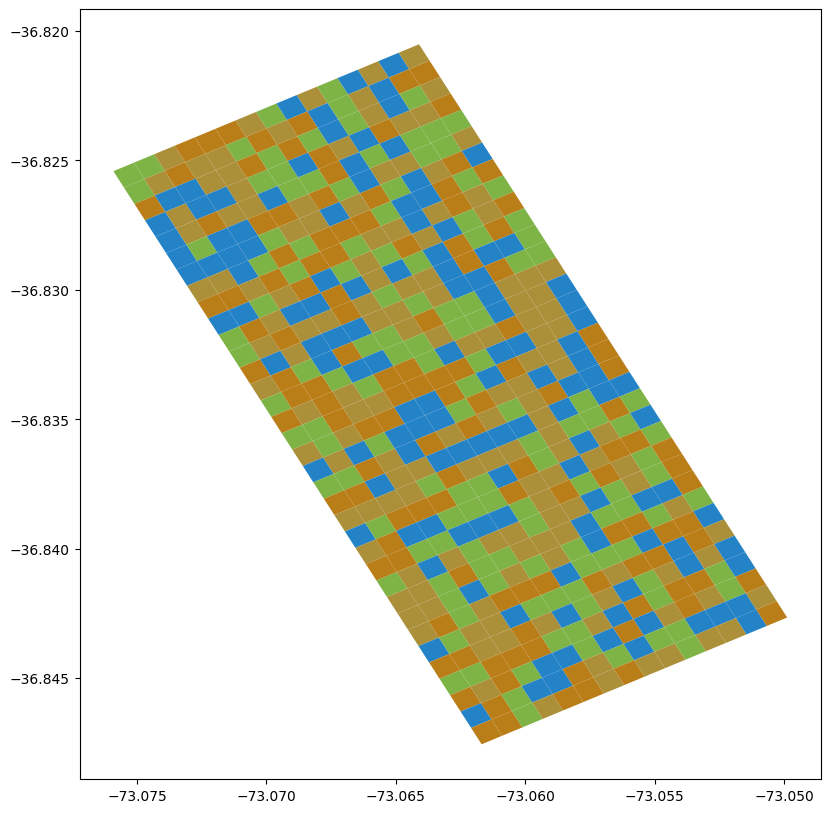

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['color_hex'])
plt.show()